# Clustering VALVE machine

We want to determine the abnormal and normal sound waves based on the features of a machine.
For the pump machine cluster the abnormal and normal sounds based on features such as 
- y_max
- zcr_max
- amp_mean

In [21]:
# Import all the necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score

from sklearn.cluster import KMeans

In [22]:
# Import the dataset
df = pd.read_csv("dataset/valve_features.csv")
correlation = df.corr()
correlation['class'].sort_values(ascending = False)

class             1.000000
y_mean            0.027144
y_min             0.026164
zcr_min           0.014071
spec_roll_min     0.011795
spec_cent_min     0.010260
zcr_mean          0.008412
spec_cent_mean    0.000492
spec_roll_mean   -0.002033
flat_mean        -0.005123
amp_min          -0.005767
melspec_std      -0.008701
flat_max         -0.009779
melspec_mean     -0.029909
y_std            -0.032896
rms_mean         -0.046125
y_max            -0.052506
zcr_max          -0.052856
amp_mean         -0.084064
Name: class, dtype: float64

Based on the above correlation data we can extract those columns and create a model that gives good results. Create another dataframe with the required features of the sound wave that are necessary in labelling the data as `Normal / Abnormal`

In [23]:
df1 = df.filter(['y_max','zcr_max','amp_mean','class'],axis=1)
df1.head()

,y_max,zcr_max,amp_mean,class
0,0.083072,0.198730,0.012551,0
1,0.091593,0.214355,0.014089,0
2,0.083659,0.200684,0.015995,0
3,0.082879,0.197754,0.016069,0
4,0.075072,0.187500,0.015526,0


## K-means clustering algorithm

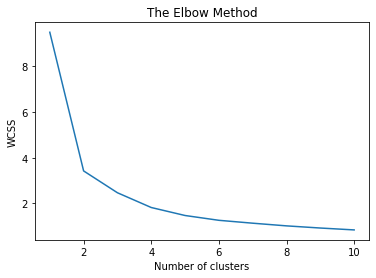

In [24]:
# Select all the columns except the column ' class'
X = df1.iloc[:,:-1].values

Xname = df1.columns[:-1]
X = pd.DataFrame(X,columns=Xname)

#using the elbow method to find the optimal number of clusters
wcss=[]
for i in range(1,11):
    kMeans = KMeans(n_clusters= i, init= 'k-means++',max_iter=300,n_init=10,random_state=0)
    kMeans.fit(X)
    wcss.append(kMeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

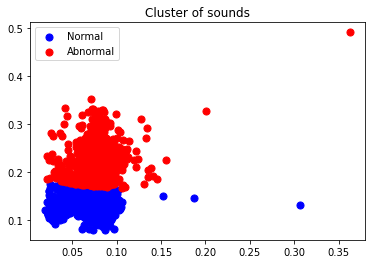

In [25]:
#Applying k-means to the mall dataset
kmeans = KMeans(n_clusters=2, init="k-means++", max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(X)

#Visualising the clusters
plt.scatter(X.values[labels == 0, 0], X.values[labels == 0, 1], s=50,c='blue',label='Normal')
plt.scatter(X.values[labels == 1, 0], X.values[labels == 1, 1], s=50,c='red',label='Abnormal')
#plt.scatter(X.values[labels == 2, 0], X.values[labels == 2, 1], s=50,c='cyan',label='Transition')
plt.title('Cluster of sounds')
plt.legend()
plt.show()

In [26]:
# checking the count of unique values
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   0, 2145],
       [   1, 2025]])

In [27]:
label = pd.DataFrame(labels,columns=['class'])
label["class"].replace({2:0}, inplace=True)
# Calcuate the score of true labels against the predicted labels.
rand_score(label['class'], df1['class'])

0.5004931339169489

## DBSCAN algorithm

Estimated number of clusters: 1
Estimated number of noise points: 427
Homogeneity: 0.149
Completeness: 0.161
V-measure: 0.154
Adjusted Rand Index: 0.338
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.357


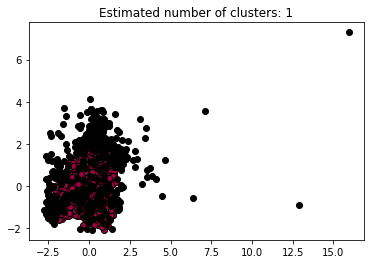

In [107]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.6, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_ = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_)) - (1 if -1 in labels_ else 0)
n_noise_ = list(labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(df['class'], labels_))
print("Completeness: %0.3f" % metrics.completeness_score(df['class'], labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(df['class'], labels_))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(df['class'], labels_))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(df['class'], labels_)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels_))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels_ == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


In [109]:
(unique, counts) = np.unique(labels_, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[  -1,  427],
       [   0, 3743]])

In [110]:
label = pd.DataFrame(labels_,columns=['class'])
label["class"].replace({-1:1}, inplace=True)

In [111]:
from sklearn.metrics.cluster import rand_score
rand_score(label['class'], df1['class'])

0.7932880177028921

### Conclusion
With K-means clustering algorithm the rand_score is around 50%. 

and DBSCAN algorithm the rand score is 79.32% for the valve machine model.